Candidate: Kumutha S.Ramachanidran
#
Date: 9/01/2023
#
Assessment: 1 
#
1) Only LSTM, Dense, and Dropout layers should be implemented in the
    model.
2) Nodes in the LSTM layers should be ≤ 64, however, the depth of the model
can be set according to your needs.
3) Window size should be set to 30 days.
4) MAPE error should be lesser than 1% when tested against testing dataset.
𝑀𝑒𝑎𝑛 𝐴𝑏𝑠𝑜𝑙𝑢𝑡𝑒 𝑃𝑒𝑟𝑐𝑒𝑛𝑡𝑎𝑔𝑒 𝐸𝑟𝑟𝑜𝑟 =
𝑀𝑒𝑎𝑛 𝐴𝑏𝑠𝑜𝑙𝑢𝑡𝑒 𝐸𝑟𝑟𝑜𝑟
𝑠𝑢𝑚(𝑎𝑏𝑠(𝑦_𝑎𝑐𝑡𝑢𝑎𝑙))
∗ 100%
5) Training loss should be displayed using TensorBoard. 

In [1]:
#importing important libraries and modules
import os
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras import callbacks
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error



In [2]:
#to copy train dataset path
filepath_train = r"C:\Users\User\Desktop\Assessment\Assessment_1\cases_malaysia_train.csv"
#filepath_test = r"C:\Users\User\Desktop\Assessment\Assessment_1\cases_malaysia_test.csv"


In [3]:
# read data into using dataframe
df_train = pd.read_csv(filepath_train)
#df_test = pd.read_csv(filepath_test)


In [4]:
#data inspection
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     680 non-null    object 
 1   cases_new                680 non-null    object 
 2   cases_import             680 non-null    int64  
 3   cases_recovered          680 non-null    int64  
 4   cases_active             680 non-null    int64  
 5   cases_cluster            680 non-null    int64  
 6   cases_unvax              680 non-null    int64  
 7   cases_pvax               680 non-null    int64  
 8   cases_fvax               680 non-null    int64  
 9   cases_boost              680 non-null    int64  
 10  cases_child              680 non-null    int64  
 11  cases_adolescent         680 non-null    int64  
 12  cases_adult              680 non-null    int64  
 13  cases_elderly            680 non-null    int64  
 14  cases_0_4                6

In [89]:
df_train.describe()


,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,cases_adolescent,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,...,680.000000,680.000000,680.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,8.788235,3766.514706,45733.016176,717.130882,2452.023529,578.805882,868.045588,4.763235,519.935294,261.016176,...,220.439706,90.754412,32.529412,0.387574,24.988166,214.372781,28.544379,38.594675,65.174556,670.340237
std,9.162540,5622.296192,67888.984001,827.327827,3191.392812,1532.323940,1877.386774,21.433285,831.685231,433.549560,...,309.611661,132.294880,48.930226,3.441856,58.327835,189.719980,31.852769,67.309716,77.725277,491.416024
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
25%,3.000000,46.500000,1158.250000,13.000000,46.500000,0.000000,0.000000,0.000000,2.000000,2.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,64.000000,4.000000,1.000000,5.000000,227.750000
50%,6.000000,1201.500000,14371.000000,417.500000,1257.500000,0.000000,0.000000,0.000000,109.000000,63.000000,...,57.000000,18.000000,6.000000,0.000000,5.000000,148.000000,16.500000,16.500000,42.500000,560.000000
75%,12.000000,5173.500000,64899.250000,1117.750000,3462.500000,118.250000,116.500000,0.000000,754.250000,304.000000,...,368.250000,149.250000,50.250000,0.000000,18.000000,312.000000,42.000000,41.000000,92.750000,1078.500000
max,72.000000,24855.000000,263845.000000,3394.000000,12684.000000,7313.000000,8456.000000,170.000000,3437.000000,1820.000000,...,1231.000000,581.000000,210.000000,54.000000,359.000000,825.000000,189.000000,501.000000,439.000000,2338.000000


In [90]:
df_train.head()


,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/1/2020,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/1/2020,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

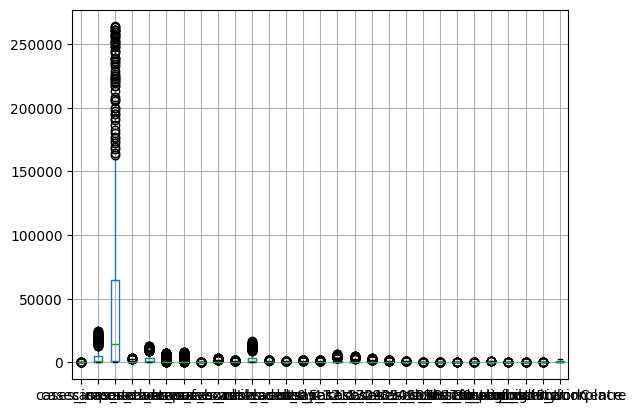

In [5]:
#to plot boxplot
df_train.boxplot()

In [93]:
df_train.isna().sum() #to check the number os NaNs #noticed 342 nans observation 

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

In [6]:
#data cleaning 
#convert into numerical or float first 
df_train['cases_new'] = pd.to_numeric(df_train['cases_new'], errors='coerce')


In [7]:
#to check the data type again for cases_new
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     680 non-null    object 
 1   cases_new                668 non-null    float64
 2   cases_import             680 non-null    int64  
 3   cases_recovered          680 non-null    int64  
 4   cases_active             680 non-null    int64  
 5   cases_cluster            680 non-null    int64  
 6   cases_unvax              680 non-null    int64  
 7   cases_pvax               680 non-null    int64  
 8   cases_fvax               680 non-null    int64  
 9   cases_boost              680 non-null    int64  
 10  cases_child              680 non-null    int64  
 11  cases_adolescent         680 non-null    int64  
 12  cases_adult              680 non-null    int64  
 13  cases_elderly            680 non-null    int64  
 14  cases_0_4                6

In [8]:
#to replace NaNs using interpolation approach limit_direction='both'

df_train['cluster_import'] = df_train['cluster_import'].interpolate(limit_direction='both') 
df_train['cluster_religious'] = df_train['cluster_religious'].interpolate(limit_direction='both') 
df_train['cluster_community'] = df_train['cluster_community'].interpolate(limit_direction='both') 
df_train['cluster_highRisk'] = df_train['cluster_highRisk'].interpolate(limit_direction='both') 
df_train['cluster_education'] = df_train['cluster_education'].interpolate(limit_direction='both') 
df_train['cluster_detentionCentre'] = df_train['cluster_detentionCentre'].interpolate(limit_direction='both') 
df_train['cluster_workplace'] = df_train['cluster_workplace'].interpolate(limit_direction='both') 
df_train['cases_new'] = df_train['cases_new'].interpolate(limit_direction='both') 

In [97]:

df_train.isna().sum() #to check the number os NaNs after interpolation method #data seems good to proceed

date                       0
cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     680 non-null    object 
 1   cases_new                680 non-null    float64
 2   cases_import             680 non-null    int64  
 3   cases_recovered          680 non-null    int64  
 4   cases_active             680 non-null    int64  
 5   cases_cluster            680 non-null    int64  
 6   cases_unvax              680 non-null    int64  
 7   cases_pvax               680 non-null    int64  
 8   cases_fvax               680 non-null    int64  
 9   cases_boost              680 non-null    int64  
 10  cases_child              680 non-null    int64  
 11  cases_adolescent         680 non-null    int64  
 12  cases_adult              680 non-null    int64  
 13  cases_elderly            680 non-null    int64  
 14  cases_0_4                6

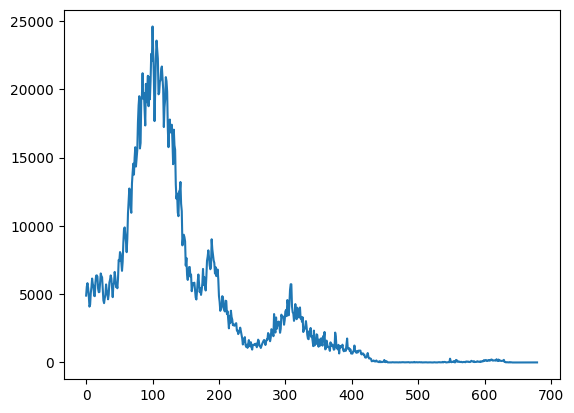

In [9]:
#reverse / inverse 
reverse_df = df_train['cases_new'][::-1]

plt.figure()
plt.plot(reverse_df.values)
plt.show()

In [10]:
#data preprocessing 
mms = MinMaxScaler() 
reverse_df = mms.fit_transform(reverse_df.values[::,None])  #

In [11]:
#data splitting 
X = []
y = [] 
win_size=30
for i in range(win_size, len(reverse_df)):
    X.append(reverse_df[i-win_size:i])
    y.append(reverse_df[i])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3, random_state=123,shuffle=True)


In [102]:
# #model development 
# model = Sequential()
# model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1:])))
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(64))
# model.add(Dense(1))
# model.summary()

# model.compile(optimizer='adam', loss='mse',metrics=['mse'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            16896     
                                                                 
 lstm_13 (LSTM)              (None, 30, 64)            33024     
                                                                 
 lstm_14 (LSTM)              (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,009
Trainable params: 83,009
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model development
regressor = Sequential()

#add first LSTM layer and droupout regularisation 
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#add second layer
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

#add third layer
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

#add fourth layer
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam',loss='mse')


In [13]:
#create the tensorboard callback
import datetime
log_path = os.path.join('log_dir', 'tl_demo', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tb = callbacks.TensorBoard(log_dir=log_path)

In [14]:
#training the model 
hist = regressor.fit(X_train, y_train, epochs=20, batch_size=64,callbacks=[tb])

Epoch 1/20
4/4 [==============================] - 6s 82ms/step - loss: 0.0479
Epoch 2/20
4/4 [==============================] - 0s 87ms/step - loss: 0.0197
Epoch 3/20
4/4 [==============================] - 0s 84ms/step - loss: 0.0225
Epoch 4/20
4/4 [==============================] - 0s 91ms/step - loss: 0.0191
Epoch 5/20
4/4 [==============================] - 0s 89ms/step - loss: 0.0104
Epoch 6/20
4/4 [==============================] - 0s 85ms/step - loss: 0.0084
Epoch 7/20
4/4 [==============================] - 0s 96ms/step - loss: 0.0113
Epoch 8/20
4/4 [==============================] - 0s 92ms/step - loss: 0.0098
Epoch 9/20
4/4 [==============================] - 0s 86ms/step - loss: 0.0078
Epoch 10/20
4/4 [==============================] - 0s 85ms/step - loss: 0.0071
Epoch 11/20
4/4 [==============================] - 0s 94ms/step - loss: 0.0093
Epoch 12/20
4/4 [==============================] - 0s 102ms/step - loss: 0.0069
Epoch 13/20
4/4 [==============================] - 0s 91ms/s

In [15]:
#model analysis 
#to load the data
cols = ['date','cases_new','cases_import','cases_recovered','cases_active','cases_cluster','cases_unvax','cases_pvax','cases_fvax','cases_boost','cases_child','cases_adolescent','cases_adult','cases_elderly','cases_0_4','cases_5_11','cases_12_17','cases_18_29','cases_30_39','cases_40_49','cases_50_59','cases_60_69','cases_70_79','cases_80','cluster_import','cluster_religious','cluster_community','cluster_highRisk','cluster_education','cluster_detentionCentre','cluster_workplace'
]
filepath_test = r"C:\Users\User\Desktop\Assessment\Assessment_1\cases_malaysia_test.csv"
df_test = pd.read_csv(filepath_test)

df_test = df_test['cases_new'][::-1]


In [16]:
#transform data test first 
test_df = mms.transform(df_test[::,None]) #convert to numpyarray 

C:\Users\User\AppData\Local\Temp\ipykernel_14652\997113094.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_df = mms.transform(df_test[::,None]) #convert to numpyarray


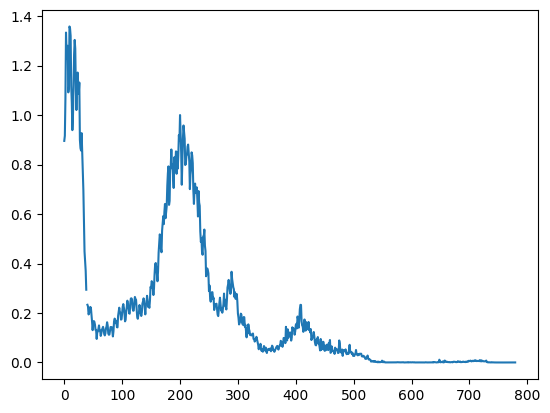

In [17]:
#train the model then joined tha class
#need to join reverse_df() and test_df 

concatenated = np.concatenate((test_df,reverse_df)) #follow the time so test first 

plt.figure()
plt.plot(concatenated)
plt.show() 

In [19]:
#test dataset 

X_testtest = []
y_testtest = [] 
win_size=30
for i in  range(win_size,len(test_df)):
    X_testtest.append(concatenated[i-win_size:i])
    y_testtest.append(concatenated[i])

X_testtest = np.array(X_testtest)
y_testtest = np.array(y_testtest)

3/3 [==============================] - 0s 18ms/step


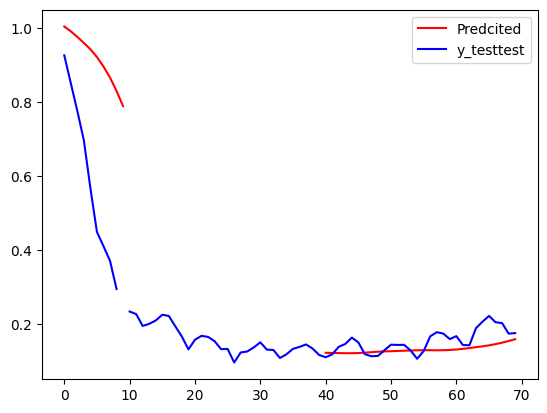

In [23]:
#model deployment 

predicted = regressor.predict(X_testtest)

plt.figure()
plt.plot(predicted, color='red')
plt.plot(y_testtest, color='blue')
plt.legend(['Predcited','y_testtest'])
plt.show()



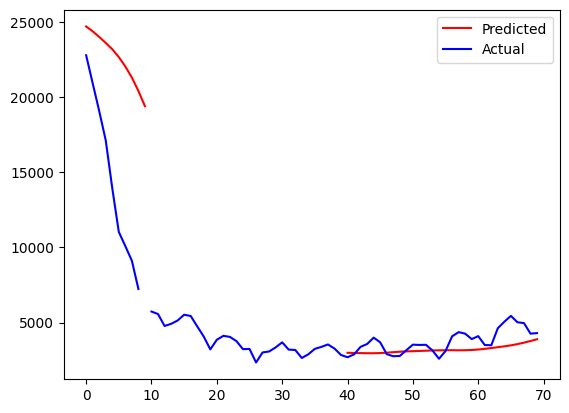

In [24]:
#inverse the normalize data 

new_confirmed_cases = mms.inverse_transform(predicted)
predicted_confirmed_cases = mms.inverse_transform(y_testtest)

plt.figure()
plt.plot(new_confirmed_cases,color='red')
plt.plot(predicted_confirmed_cases, color='blue')
plt.legend(['Predicted','Actual'])
plt.show()




In [26]:
#to save trained model 
regressor.save('Covid19.h5')